# PRG 1 make change greedy

In [3]:
# make change greedy alg
def makeChangeGreedy(amount, coins):
    # make a list of the coins
    change = []
    # loop over the coins
    for coin in coins:
        # check if the coin is smaller than the amount
        while coin <= amount:
            # add the coin to the list
            change.append(coin)
            # subtract the coin from the amount
            amount -= coin
    # return the list
    return change

# test the function
print(makeChangeGreedy(10, [25, 10, 5, 1]))

[10]


# PRG 2 make change exhaustive (not recur)

In [4]:

def makeAllChange(amount, coins):
    possibilities = []

    last_node = []
    last_amount = amount
    last_used_coin = 0

    test_comb = True
    while test_comb:

        leaf = True
        # we move forward in the tree
        # and try to add the biggest coin possible
        for i in range(last_used_coin, len(coins)):
            coin = coins[i]
            if coin <= last_amount + 0.001:
                last_node.append(i)
                last_amount -= coin
                last_used_coin = i
                leaf = False
                break
        
        # if we can't add a coin it's a leaf of the tree
        if leaf:
            # if the amount is 0 we found a new solution
            if last_amount <= 0.001:
                possibilities.append(last_node.copy())

            # now we move backward in the tree
            go_up = True
            while go_up:
                # we remove the last used coin and try with a smaller one
                item = last_node.pop(-1)
                last_amount += coins[item]
                last_used_coin = item + 1

                # if we have tested all coins at this level
                if (last_used_coin == len(coins)):
                    # if the level is the root -> we have tested all possibilities
                    if len(last_node) == 0:
                        go_up = False
                        test_comb = False
                    else: # else we go up of one level
                        go_up = True
                else: # if we have not tested all coins at this level
                    # we stop going up and test the next coin
                    last_node.append(last_used_coin)
                    last_amount -= coins[last_used_coin]

                    go_up = False

    # reorganize the possibilities array with coin values instead of indexes
    for i in range(len(possibilities)):
        possibilities[i] = [coins[j] for j in possibilities[i]]

    return possibilities

# test the function
print(makeAllChange(10, [25, 10, 5, 1]))

file = open("allchange.txt", "w")
out = makeAllChange(12.35, [5, 2, 1, 0.5, 0.2, 0.1, 0.05])
for i in range(len(out)):
    for j in range(len(out[i])):
        file.write(str(out[i][j]) + " ")
    file.write("\n")
print(len(out))

[[10], [5, 5], [5, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
266724


# PRG 3 make change exhaustive (recur)

In [5]:

def makeAllChangeRecur(amount, coins, doneChange=[]):
    if (amount <= 0.001):
        return [doneChange]

    res = []
    # for each coin
    for i in range(len(coins)):
        coin = coins[i]
        # if the coin is smaller than the amount
        if coin <= amount + 0.001:
            # we add the coin to the list of coins
            # and we test others sub possiblites
            remainingSolves = makeAllChangeRecur(amount - coin, coins[i:], doneChange.copy()  + [coin])

            for remainingSolve in remainingSolves:
                res.append(remainingSolve)
    return res

# test the function
print(makeAllChangeRecur(12, [5, 3, 2]))

file = open("allchangeRecur.txt", "w")
out = makeAllChangeRecur(12.35, [5, 2, 1, 0.5, 0.2, 0.1, 0.05])
for i in range(len(out)):
    for j in range(len(out[i])):
        file.write(str(out[i][j]) + " ")
    file.write("\n")
print(len(out))

[[5, 5, 2], [5, 3, 2, 2], [3, 3, 3, 3], [3, 3, 2, 2, 2], [2, 2, 2, 2, 2, 2]]
266724


# PRG 5&6 cost and best solution

In [6]:
from time import time


def eval_change(change):
    # we evaluate the change by the number of coins
    # the less the better
    return len(change)


time_start = time()
allchanges = makeAllChange(12.35, [5, 2, 1, 0.5, 0.2, 0.1, 0.05])
best = allchanges[0]
best_cost = eval_change(allchanges[0])

# list all possibilites and find the one with the best cost
for change in allchanges:
    cost = eval_change(change)
    if cost < best_cost:
        best_cost = cost
        best = change

print(best)
print("execution time: " + str(time() - time_start))

[5, 5, 2, 0.2, 0.1, 0.05]
execution time: 7.2823216915130615


# PRG 7

In [7]:
# same algorithm but 
# we stop at the first solution
# wich is the best solution because we start
# exploring the tree with the biggest coin first
def makeAChange(amount, coins):
    possibilities = []

    last_node = []
    last_amount = amount
    last_used_coin = 0

    test_comb = True
    while test_comb:


        leaf = True
        # we move forward in the tree
        # and try to add the biggest coin possible
        for i in range(last_used_coin, len(coins)):
            coin = coins[i]
            if coin <= last_amount + 0.001:

                last_node.append(i)
                last_amount -= coin
                last_used_coin = i
                leaf = False
                break
        
        # if we can't add a coin it's a leaf of the tree
        if leaf:
            # if the amount is 0 we found a new solution

            if last_amount <= 0.001: # we stop here because only one solution is needed
                test_comb = False
                possibilities.append(last_node.copy())

            # now we move backward in the tree
            go_up = True
            while go_up:
                # we remove the last used coin and try with a smaller one

                item = last_node.pop(-1)
                last_amount += coins[item]
                last_used_coin = item + 1


                # if we have tested all coins at this level
                if (last_used_coin == len(coins)):
                    # if the level is the root -> we have tested all possibilities
                    if len(last_node) == 0:
                        go_up = False
                        test_comb = False
                    else: # else we go up of one level
                        go_up = True
                else:# if we have not tested all coins at this level
                    # we stop going up and test the next coin
                    last_node.append(last_used_coin)
                    last_amount -= coins[last_used_coin]

                    go_up = False

     # reorganize the possibilities array with coin values instead of indexes
    for i in range(len(possibilities)):
        possibilities[i] = [coins[j] for j in possibilities[i]]

    return possibilities


start_time = time()
print(makeAChange(12.35, [5, 2, 1, 0.5, 0.2, 0.1, 0.05]))
print("execution time: " + str(time() - start_time))


[[5, 5, 2, 0.2, 0.1, 0.05]]
execution time: 0.00012993812561035156


# PRG 8 : compute N best changes

In [8]:
# exactly same algorithm than before
# but we just return the results when we find @nb_max
# solutions

def makeSomesChange(amount, coins, nb_max):
    possibilities = []

    last_node = []
    last_amount = amount
    last_used_coin = 0

    test_comb = True
    n = 5
    while test_comb:


        leaf = True
        for i in range(last_used_coin, len(coins)):
            coin = coins[i]
            if coin <= last_amount + 0.001:

                last_node.append(i)
                last_amount -= coin
                last_used_coin = i
                leaf = False
                # if (n > 0):
                #     print(coin, last_amount, last_node)
                break

        if leaf:
            if (n > 0):
                n-=1

            if last_amount <= 0.001:
                possibilities.append(last_node.copy())
                if (len(possibilities) >= nb_max):
                    test_comb = False

            go_up = True
            while go_up:

                item = last_node.pop(-1)
                last_amount += coins[item]
                last_used_coin = item + 1


                if (last_used_coin == len(coins)):
                    if len(last_node) == 0:
                        go_up = False
                        test_comb = False
                    else:
                        go_up = True
                else:
                    last_node.append(last_used_coin)
                    last_amount -= coins[last_used_coin]

                    go_up = False

    for i in range(len(possibilities)):
        possibilities[i] = [coins[j] for j in possibilities[i]]

    return possibilities


start_time = time()
changes = makeSomesChange(12.35, [5, 2, 1, 0.5, 0.2, 0.1, 0.05], 5)
for change in changes:
    print(change)
print("execution time: " + str(time() - start_time))

[5, 5, 2, 0.2, 0.1, 0.05]
[5, 5, 2, 0.2, 0.05, 0.05, 0.05]
[5, 5, 2, 0.1, 0.1, 0.1, 0.05]
[5, 5, 2, 0.1, 0.1, 0.05, 0.05, 0.05]
[5, 5, 2, 0.1, 0.05, 0.05, 0.05, 0.05, 0.05]
execution time: 0.0001780986785888672


In [9]:
L = [5, 2, 1, 0.5, 0.2, 0.1, 0.05]
A = 12.35
start = time()
# try to annalyse execution time of the half of solutions
print(len(makeSomesChange(A, L, 266724/2)))
print("execution time: " + str(time() - start))

# divided by more than two, because first solution are smaller than the last ones

133362
execution time: 3.7820885181427


# Relationship part

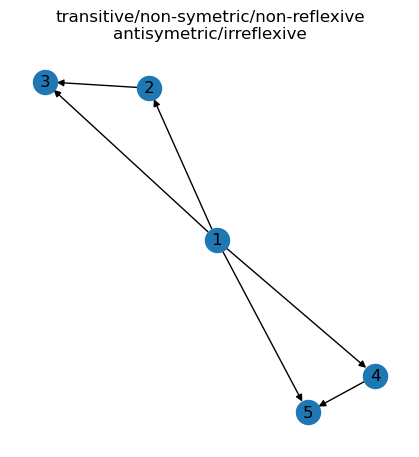

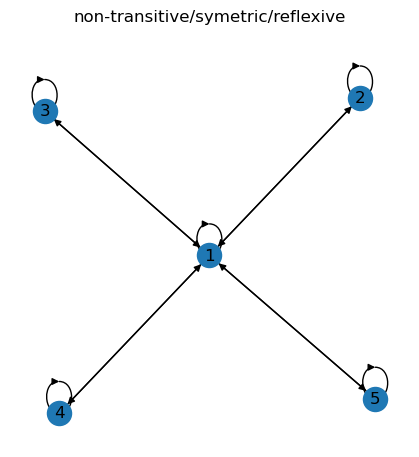

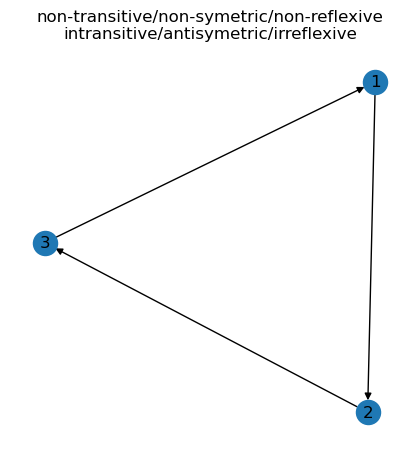

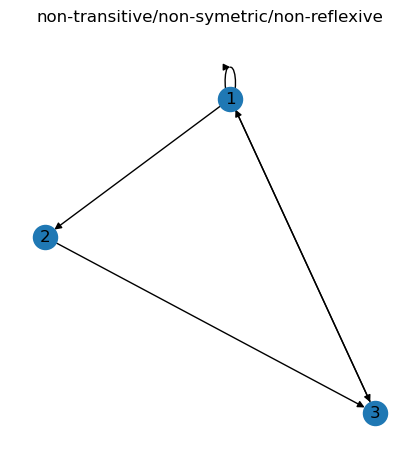

In [10]:
def isTransitive(M):
    # check if the matrix is square
    if len(M) != len(M[0]):
        return False
    
    for i in range(len(M)):
        for j in range(len(M)):
            if M[i][j] == 1:
                for k in range(len(M)):
                    if M[j][k] == 1 and M[i][k] == 0:
                        return False
    return True

def isSymetric(M):
    # check if the matrix is square
    if len(M) != len(M[0]):
        return False
    
    for i in range(len(M)):
        for j in range(len(M)):
            if M[i][j] != M[j][i]:
                return False
    return True

def isReflexive(M):
    # check if the matrix is square
    if len(M) != len(M[0]):
        return False
    
    for i in range(len(M)):
        if M[i][i] != 1:
            return False
    return True

def isIntransitive(M):
    # check if the matrix is square
    if len(M) != len(M[0]):
        return False
    
    for i in range(len(M)):
        for j in range(len(M)):
            if M[i][j] == 1:
                for k in range(len(M)):
                    if M[j][k] == 1 and M[i][k] == 1:
                        return False
    return True

def isAntiSymetric(M):
    # check if the matrix is square
    if len(M) != len(M[0]):
        return False
    
    for i in range(len(M)):
        for j in range(len(M)):
            if M[i][j] == 1 and M[j][i] == 1 and i != j:
                return False
    return True

def isIrreflexive(M):
    # check if the matrix is square
    if len(M) != len(M[0]):
        return False
    
    for i in range(len(M)):
        if M[i][i] == 1:
            return False
    return True

# compute all attribues of a relation
def getInfos(M):
    datas = []
    if (isTransitive(M)):
        datas.append("transitive")
    else:
        datas.append("non-transitive")
    if (isSymetric(M)):
        datas.append("symetric")
    else:
        datas.append("non-symetric")
    if (isReflexive(M)):
        datas.append("reflexive")
    else:
        datas.append("non-reflexive")
    
    data2 = []
    if (isIntransitive(M)):
        data2.append("intransitive")
    if (isAntiSymetric(M)):
        data2.append("antisymetric")
    if (isIrreflexive(M)):
        data2.append("irreflexive")
    return "/".join(datas) + "\n" + "/".join(data2)

# plot the graph with neworkx
def plotGraph(mat, title):
    import networkx as nx
    import matplotlib.pyplot as plt

    G = nx.DiGraph()
    for i in range(len(mat)):
        for j in range(len(mat)):
            if mat[i][j] == 1:
                G.add_edge(i + 1, j + 1)

    plt.figure(1, figsize=(4,4)) 
    nx.draw(G, with_labels=True)
    
    plt.title(title)
    plt.show()





# test the function
M =[[0, 1, 1, 1, 1],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0]]
plotGraph(M, getInfos(M))

# test the function
M =[[1, 1, 1, 1, 1],
    [1, 1, 0, 0, 0],
    [1, 0, 1, 0, 0],
    [1, 0, 0, 1, 0],
    [1, 0, 0, 0, 1]]
plotGraph(M, getInfos(M))

# test the function
M =[[0, 1, 0],
    [0, 0, 1],
    [1, 0, 0]]
plotGraph(M, getInfos(M))

M =[[1, 1, 1],
    [0, 0, 1],
    [1, 0, 0]]
plotGraph(M, getInfos(M))


